# "Chaos"

### Reproduction of basins of attraction for a nonlinear forced pendulum from "Regularity in Nonlinear Dynamics" Holt & Holt 1993, https://doi.org/10.1093/bjps/44.4.711


In [1]:
import pickle

from multiprocessing import Pool
from multiprocessing.dummy import Pool as ThreadPool 

import time

import numpy as np
import scipy as sp
from scipy import integrate
from scipy import pi, sin, cos

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
def f(t, y): #, mu, m, g, l, d_f, tor):
    mu = 1.96 # Friction factor
    m = 1.0   # Mass
    g = 9.8 # Gravity
    l = 9.8 # Length of string
    d_f = 1.0 # Driving frequency
    tor = 19.6 # Driving toque
    
    return ( y[1], (-m*g*sin(y[0]) - mu*y[1] + tor*sin(d_f*t))/(m*l) ) 

def compute_rand_sol(mu=1.96, m=1, g=9.8, l=9.8, d_f=1.0, tor=19.6, theta_rng=6, omega_rng=12, t_max=150, high_res=False):
    np.random.seed()
    theta  = theta_rng*np.random.random(1)[-1] - (theta_rng/2) # Rand theta
    np.random.seed()
    omega  = omega_rng*np.random.random(1)[-1] - (omega_rng/2) # Rand omega

    y0 = [theta, omega] # Initial vals
    #t_ = np.arange(0, 100, 0.01)
    t_ = (0, t_max)
    
    if not high_res:
        ode_sol = integrate.solve_ivp(f, t_, y0, method='RK45', rtol=1e-2, atol=1e-3) #, args=(mu, m, g, l, d_f, tor))
    else:
        ode_sol = integrate.solve_ivp(f, t_, y0, method='RK45', rtol=1e-8, atol=1e-8)
    #ode_sol = integrate.odeint(f, y0, t_)

    return ode_sol.y, theta, omega, ode_sol.t

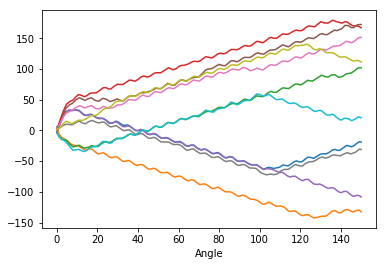

0.30524373054504395


In [4]:
#def run_ivp(num_pts, s_fact):
s_time = time.time()

num_pts=10

thetas_cw_ = list()
omegas_cw_ = list()

thetas_ccw_ = list()
omegas_ccw_ = list()

for i in range(0,num_pts):
    res, th, om, t_ = compute_rand_sol(mu = 1.96, 
                                       m  = 1.0, 
                                       g  = 9.8, 
                                       l  = 19.8, 
                                       d_f= 1.0, 
                                       tor= 19.6, 
                                       theta_rng=12, omega_rng=24, t_max=150)
    plt.plot(t_, res[0,:].T),plt.xlabel('Angle'),plt.ylabel('')

plt.show()

e_time = time.time()
print(e_time-s_time)

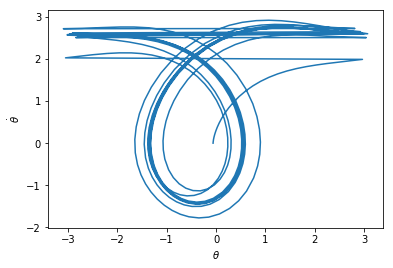

In [45]:
res, th, om, t_ = compute_rand_sol(mu = 1.96, 
                                   m  = 1.0, 
                                   g  = 9.8, 
                                   l  = 19.8, 
                                   d_f= 1.0, 
                                   tor= 19.6, 
                                   theta_rng=1, omega_rng=0, t_max=200, high_res=True)
res[0,:] = (res[0,:] + np.pi) % (2 * np.pi ) - np.pi
len(res[0,:])
plt.plot(res[0,:].T, res[1,:].T),plt.xlabel(r"$ \theta $"),plt.ylabel(r"$ \dot \theta $")
plt.show()

In [6]:
def run_basins(num_pts, s_fact):
    thetas_cw_ = list()
    omegas_cw_ = list()

    thetas_ccw_ = list()
    omegas_ccw_ = list()
    
    for i in range(0,num_pts):
        res, th, om, t_ = compute_rand_sol(mu = 1.96*s_fact, 
                                           m  = 1.0*s_fact, 
                                           g  = 9.8*s_fact, 
                                           l  = 9.8*s_fact, 
                                           d_f= 1.0*s_fact, 
                                           tor= 19.6*s_fact, 
                                           theta_rng=48, omega_rng=96, t_max=50)
        if res[0,-1] > 0:
            thetas_cw_.append(th)
            omegas_cw_.append(om)
        else:
            thetas_ccw_.append(th)
            omegas_ccw_.append(om)
    
    
    return thetas_cw_, omegas_cw_, thetas_ccw_, omegas_ccw_

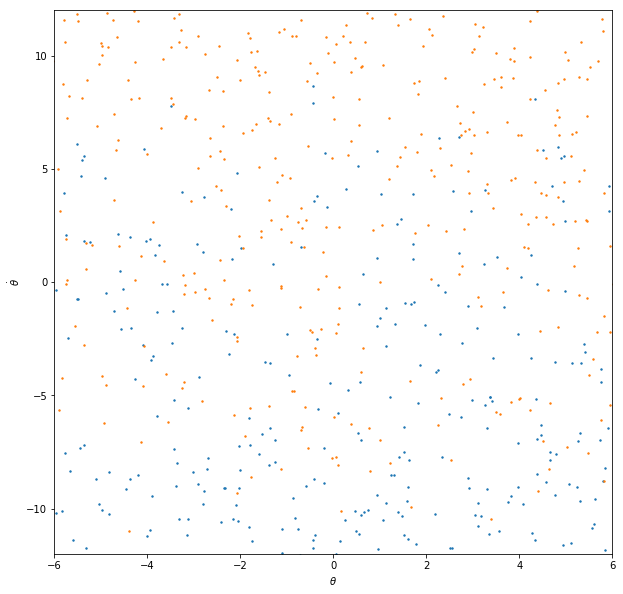

In [7]:
thetas_cw_, omegas_cw_, thetas_ccw_, omegas_ccw_ = run_basins(10000, 1)

graphic_size = 10
matplotlib.rcParams.update({"font.size": graphic_size})
plt.figure(figsize=(graphic_size, graphic_size))

plt.scatter(thetas_ccw_, omegas_ccw_, s=2)
plt.scatter(thetas_cw_, omegas_cw_, s=2)
plt.xlabel(r"$ \theta $")
plt.ylabel(r"$ \dot \theta $")
plt.xlim((-6,6))
plt.ylim((-12,12))
plt.show()
#plt.savefig("saved_figs/jul10-large-0-4.png")

## Plot a CPU run, binary data (CW/CCW)

In [ ]:
with open('jul11-run1','rb') as fp:
    thetas_cw_=pickle.load(fp)
    omegas_cw_=pickle.load(fp)
    thetas_ccw_=pickle.load(fp)
    omegas_ccw_=pickle.load(fp)
    
matplotlib.rcParams.update({"font.size": 120})
plt.figure(figsize=(120,120))
plt.scatter(thetas_ccw_, omegas_ccw_, s=1)
plt.scatter(thetas_cw_, omegas_cw_, s=1)
plt.xlabel(r"$ \theta $")
plt.ylabel(r"$ \dot \theta $")
plt.xlim((-3,3))
plt.ylim((-6,6))
#plt.show()
#plt.savefig("saved_figs/jul11-xlarge-1.png")

## Plot a CPU run, gradient

In [ ]:
with open('jul14-timeres-odeint-2','rb') as fp:
    res_s=cPickle.load(fp)
    thetas=cPickle.load(fp)
    omegas=cPickle.load(fp)
    time_line=cPickle.load(fp)
    
for i in range(1600):
    thetas_cw_ = list()
    omegas_cw_ = list()

    thetas_ccw_ = list()
    omegas_ccw_ = list()
    
    colors_cw_ = list()
    colors_ccw_ = list()

    for j in range(len(res_s)):
        #shapes.append(res.shape)

        if res_s[j][i,0] > 0:
            thetas_cw_.append(thetas[j])
            omegas_cw_.append(omegas[j])
            colors_cw_.append(res_s[j][i,0])
        else:
            thetas_ccw_.append(thetas[j])
            omegas_ccw_.append(omegas[j])
            colors_ccw_.append(res_s[j][i,0])

    matplotlib.rcParams.update({"font.size": 20})
    plt.figure(figsize=(20,20))
    
    plt.scatter(thetas_ccw_, omegas_ccw_, s=0.5, c=colors_ccw_, cmap="winter")
    plt.scatter(thetas_cw_, omegas_cw_, s=0.5, c=colors_cw_, cmap="autumn")
    plt.xlabel(r"$ \theta $")
    plt.ylabel(r"$ \dot \theta $")
    plt.title("Time: {:.2f}".format(i*0.05))
    plt.xlim((-3,3))
    plt.ylim((-6,6))
    #plt.show()
    #plt.savefig("anim10/{}.png".format(str(i).zfill(4))) #zfill leading zeros
    plt.close()